<a href="https://colab.research.google.com/github/shiernee/Advanced_ML/blob/main/Week8/WOA7015_Wk9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to WOA7015 Advance Machine Learning Lab - Week 9
This code is generated for the purpose of WOA7015 module.
The code is available in github https://github.com/shiernee/Advanced_ML 


# Section1 : Massage Passing
In this section, we go through the computation we covered in Massage Passing  

In [14]:
import numpy as np
from scipy.linalg import sqrtm 
from scipy.special import softmax
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
from IPython.display import HTML

### create adjacent matrix in slide 56. 

In [15]:
# create adjacent matrix in slide 56
A = np.array(
    [[0, 1, 0, 0, 0], 
     [1, 0, 1, 0, 0], 
     [0, 1, 0, 1, 1], 
     [0, 0, 1, 0, 0], 
     [0, 0, 1, 0, 0]]
)
A

array([[0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

In [16]:
feats = np.arange(A.shape[0]).reshape((-1,1))+1
feats

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [17]:
H = A @ feats
H

array([[ 2],
       [ 4],
       [11],
       [ 3],
       [ 3]])

Scale neighborhood sum by neighborhood size (i.e. average values)

In [18]:
D = np.zeros(A.shape)
np.fill_diagonal(D, A.sum(axis=0))
D

array([[1., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [19]:
D_inv = np.linalg.inv(D)
D_inv

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [20]:
D_inv @ A 

array([[0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.        , 0.5       , 0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.33333333, 0.33333333],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ]])

In [21]:
H_avg = D_inv @ A @ feats
H_avg

array([[2.        ],
       [2.        ],
       [3.66666667],
       [3.        ],
       [3.        ]])

Normalized Adjacency Matrix

In [23]:
import networkx as nx
# create a network based on matrix A
g = nx.from_numpy_array(A)


In [33]:
# create A_mod = A + identify matrix
print(g.number_of_nodes())
print()
print(np.eye(g.number_of_nodes()))
print()
A_tilda = A + np.eye(g.number_of_nodes())

print(A_tilda)

5

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

[[1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1.]]


In [34]:
# D_tilda for A_tilda:
D_tilda = np.zeros_like(A_tilda)
np.fill_diagonal(D_tilda, A_tilda.sum(axis=1).flatten())
print(D_tilda)
print()

# Inverse square root of D:
D_tilda_invroot = np.linalg.inv(sqrtm(D_tilda))
print(D_tilda_invroot)

[[2. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0.]
 [0. 0. 4. 0. 0.]
 [0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 2.]]

[[0.70710678 0.         0.         0.         0.        ]
 [0.         0.57735027 0.         0.         0.        ]
 [0.         0.         0.5        0.         0.        ]
 [0.         0.         0.         0.70710678 0.        ]
 [0.         0.         0.         0.         0.70710678]]


In [35]:
node_labels = {i: i+1 for i in range(g.number_of_nodes())}
pos = nx.planar_layout(g)

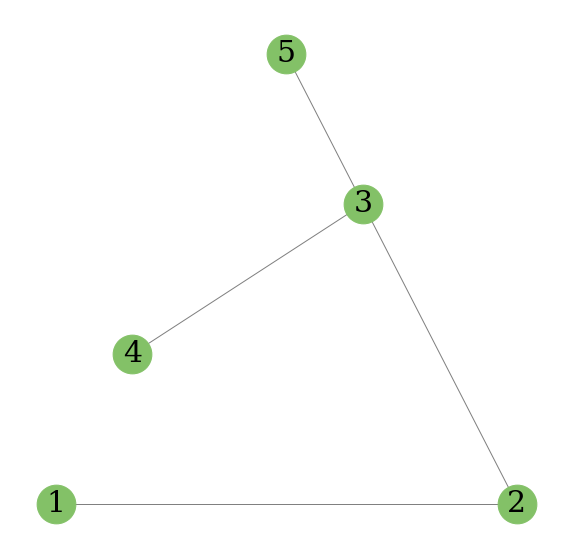

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
nx.draw(
    g, pos, with_labels=True, 
    labels=node_labels, 
    node_color='#83C167', 
    ax=ax, edge_color='gray', node_size=1500, font_size=30, font_family='serif'
)
plt.savefig('simple_graph.png', bbox_inches='tight', transparent=True)

# Now is your turn. 
Try to generate the following graph. 



In [ ]:
https://github.com/danielegrattarola/spektral/blob/master/examples/other/graph_signal_classification_mnist.py

In [1]:
!pip install git+https://github.com/danielegrattarola/spektral

  Cloning https://github.com/danielegrattarola/spektral to /tmp/pip-req-build-x1921o1n
  Running command git clone -q https://github.com/danielegrattarola/spektral /tmp/pip-req-build-x1921o1n
  Created wheel for spektral: filename=spektral-1.0.8-py3-none-any.whl size=123386 sha256=21d9d1f3001b686bf8ad912f0b12becf80d949b00965fabbdbac46a6180bb3b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-n373m46l/wheels/af/7c/1f/e06aba9c0f493bb708968b8b396fe7523fdfb1c1c0818730be
Successfully built spektral


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import sparse_categorical_accuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from spektral.data import MixedLoader
from spektral.datasets.mnist import MNIST
from spektral.layers import GCNConv, GlobalSumPool
from spektral.utils.sparse import sp_matrix_to_sp_tensor

In [3]:
# Parameters
batch_size = 32  # Batch size
epochs = 1000  # Number of training epochs
patience = 10  # Patience for early stopping
l2_reg = 5e-4  # Regularization rate for l2


In [4]:
# Load data
data = MNIST()

# The adjacency matrix is stored as an attribute of the dataset.
# Create filter for GCN and convert to sparse tensor.
data.a = GCNConv.preprocess(data.a)
data.a = sp_matrix_to_sp_tensor(data.a)


11501568/11490434 [==============================] - 0s 0us/step


In [13]:
print(data.a)

TypeError: ignored

In [ ]:
# Train/valid/test split
data_tr, data_te = data[:-10000], data[-10000:]
np.random.shuffle(data_tr)
data_tr, data_va = data_tr[:-10000], data_tr[-10000:]

In [ ]:
# We use a MixedLoader since the dataset is in mixed mode
loader_tr = MixedLoader(data_tr, batch_size=batch_size, epochs=epochs)
loader_va = MixedLoader(data_va, batch_size=batch_size)
loader_te = MixedLoader(data_te, batch_size=batch_size)


In [ ]:
# Build model
class Net(Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.conv1 = GCNConv(32, activation="elu", kernel_regularizer=l2(l2_reg))
        self.conv2 = GCNConv(32, activation="elu", kernel_regularizer=l2(l2_reg))
        self.flatten = GlobalSumPool()
        self.fc1 = Dense(512, activation="relu")
        self.fc2 = Dense(10, activation="softmax")  # MNIST has 10 classes

    def call(self, inputs):
        x, a = inputs
        x = self.conv1([x, a])
        x = self.conv2([x, a])
        output = self.flatten(x)
        output = self.fc1(output)
        output = self.fc2(output)

        return output


# Create model
model = Net()
optimizer = Adam()
loss_fn = SparseCategoricalCrossentropy()

In [ ]:
# Training function
@tf.function
def train_on_batch(inputs, target):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(target, predictions) + sum(model.losses)
        acc = tf.reduce_mean(sparse_categorical_accuracy(target, predictions))

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss, acc


# Evaluation function
def evaluate(loader):
    step = 0
    results = []
    for batch in loader:
        step += 1
        inputs, target = batch
        predictions = model(inputs, training=False)
        loss = loss_fn(target, predictions)
        acc = tf.reduce_mean(sparse_categorical_accuracy(target, predictions))
        results.append((loss, acc, len(target)))  # Keep track of batch size
        if step == loader.steps_per_epoch:
            results = np.array(results)
            return np.average(results[:, :-1], 0, weights=results[:, -1])


In [ ]:
# Setup training
best_val_loss = 99999
current_patience = patience
step = 0

# Training loop
results_tr = []
for batch in loader_tr:
    step += 1

    # Training step
    inputs, target = batch
    loss, acc = train_on_batch(inputs, target)
    results_tr.append((loss, acc, len(target)))

    if step == loader_tr.steps_per_epoch:
        results_va = evaluate(loader_va)
        if results_va[0] < best_val_loss:
            best_val_loss = results_va[0]
            current_patience = patience
            results_te = evaluate(loader_te)
        else:
            current_patience -= 1
            if current_patience == 0:
                print("Early stopping")
                break

        # Print results
        results_tr = np.array(results_tr)
        results_tr = np.average(results_tr[:, :-1], 0, weights=results_tr[:, -1])
        print(
            "Train loss: {:.4f}, acc: {:.4f} | "
            "Valid loss: {:.4f}, acc: {:.4f} | "
            "Test loss: {:.4f}, acc: {:.4f}".format(
                *results_tr, *results_va, *results_te
            )
        )

        # Reset epoch
        results_tr = []
        step = 0

Train loss: 2.1471, acc: 0.2214 | Valid loss: 2.0697, acc: 0.2481 | Test loss: 2.0633, acc: 0.2490
Train loss: 1.9853, acc: 0.2589 | Valid loss: 1.8659, acc: 0.2967 | Test loss: 1.8524, acc: 0.2912
Train loss: 1.8527, acc: 0.2969 | Valid loss: 1.8273, acc: 0.3116 | Test loss: 1.8141, acc: 0.3030
Train loss: 1.8278, acc: 0.3091 | Valid loss: 1.8236, acc: 0.3034 | Test loss: 1.8180, acc: 0.3049
Train loss: 1.8174, acc: 0.3118 | Valid loss: 1.7939, acc: 0.3209 | Test loss: 1.7765, acc: 0.3220
Train loss: 1.8121, acc: 0.3138 | Valid loss: 1.8060, acc: 0.3151 | Test loss: 1.7765, acc: 0.3220
Train loss: 1.8051, acc: 0.3149 | Valid loss: 1.7860, acc: 0.3219 | Test loss: 1.7773, acc: 0.3193
Train loss: 1.8035, acc: 0.3144 | Valid loss: 1.7866, acc: 0.3238 | Test loss: 1.7773, acc: 0.3193
Train loss: 1.8011, acc: 0.3159 | Valid loss: 1.7799, acc: 0.3223 | Test loss: 1.7755, acc: 0.3162
Train loss: 1.8011, acc: 0.3168 | Valid loss: 1.7826, acc: 0.3193 | Test loss: 1.7755, acc: 0.3162
Train loss

# Acknowledgement
This exercise is inherited from https://github.com/danielegrattarola/spektral/blob/master/examples/other/graph_signal_classification_mnist.py 